In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [3]:
# Load datasets
addr_addr_df = pd.read_csv("./dataSet/AddrAddr_edgelist.csv")
addr_tx_df = pd.read_csv("./dataSet/AddrTx_edgelist.csv")
tx_addr_df = pd.read_csv("./dataSet/TxAddr_edgelist.csv")
wallets_classes_df = pd.read_csv("./dataSet/wallets_classes.csv")
wallets_features_df = pd.read_csv("./dataSet/wallets_features.csv")
wallets_features_classes_combined_df = pd.read_csv("./dataSet/wallets_features_classes_combined.csv")


In [4]:
# Display basic information about datasets
datasets = {
    "AddrAddr": addr_addr_df,
    "AddrTx": addr_tx_df,
    "TxAddr": tx_addr_df,
    "Wallets Classes": wallets_classes_df,
    "Wallets Features": wallets_features_df,
    "Wallets Features Combined": wallets_features_classes_combined_df,
}

for name, df in datasets.items():
    print(f"\n--- {name} ---")
    print(df.info())
    print(df.describe(include='all').transpose())
    print(f"Missing values:\n{df.isnull().sum()}")



--- AddrAddr ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868964 entries, 0 to 2868963
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   input_address   object
 1   output_address  object
dtypes: object(2)
memory usage: 43.8+ MB
None
                  count  unique                                 top   freq
input_address   2868964  400212  1GX28yLjVWux7ws4UQ9FB4MnLH4UKTPK2z  37835
output_address  2868964  641043  1N52wHoVR79PMDishab2XmRHsbekCdGquK  12019
Missing values:
input_address     0
output_address    0
dtype: int64

--- AddrTx ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477117 entries, 0 to 477116
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   input_address  477117 non-null  object
 1   txId           477117 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.3+ MB
None
                  count  unique                              

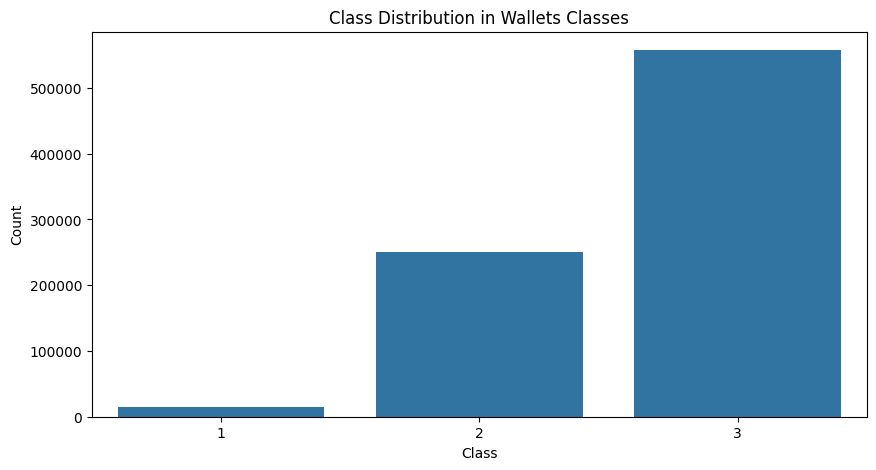

In [5]:
# Plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=wallets_classes_df, x='class')
plt.title('Class Distribution in Wallets Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


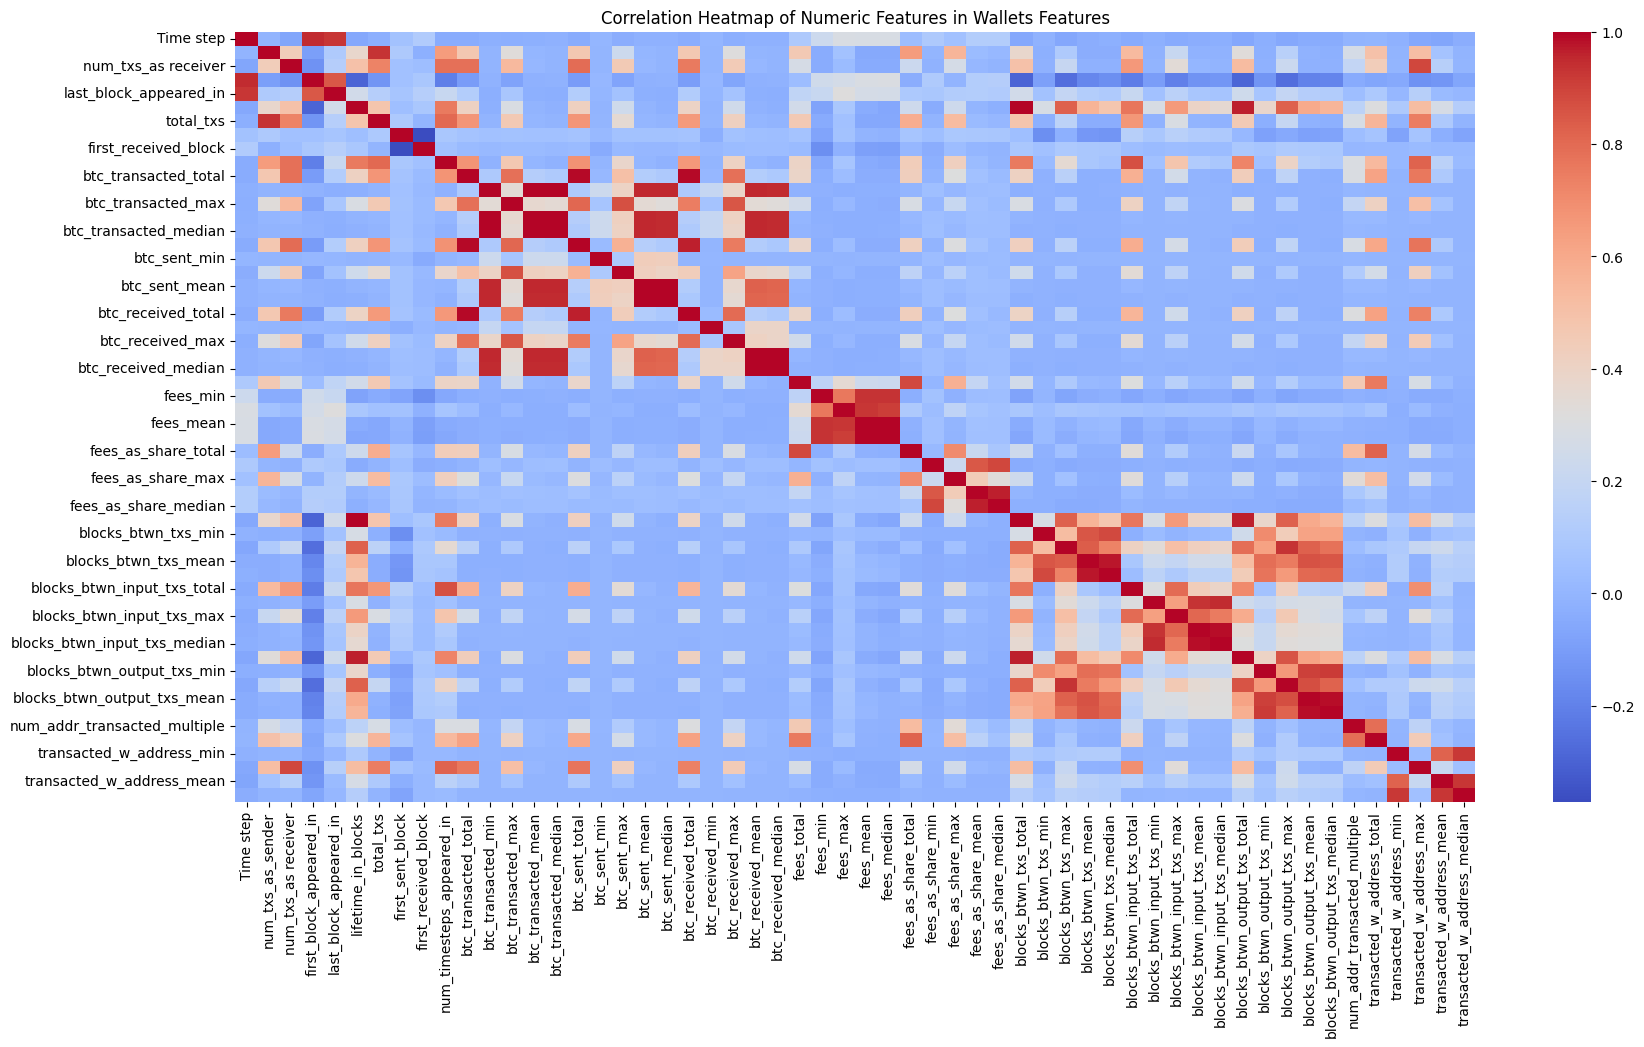

In [7]:
# Exclude non-numeric columns
numeric_features = wallets_features_df.select_dtypes(include=[np.number])

# Check if there are any numeric columns left
if numeric_features.empty:
    print("No numeric columns found for correlation analysis.")
else:
    # Calculate correlation matrix
    correlation_matrix = numeric_features.corr()

    # Plot the heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
    plt.title("Correlation Heatmap of Numeric Features in Wallets Features")
    plt.show()


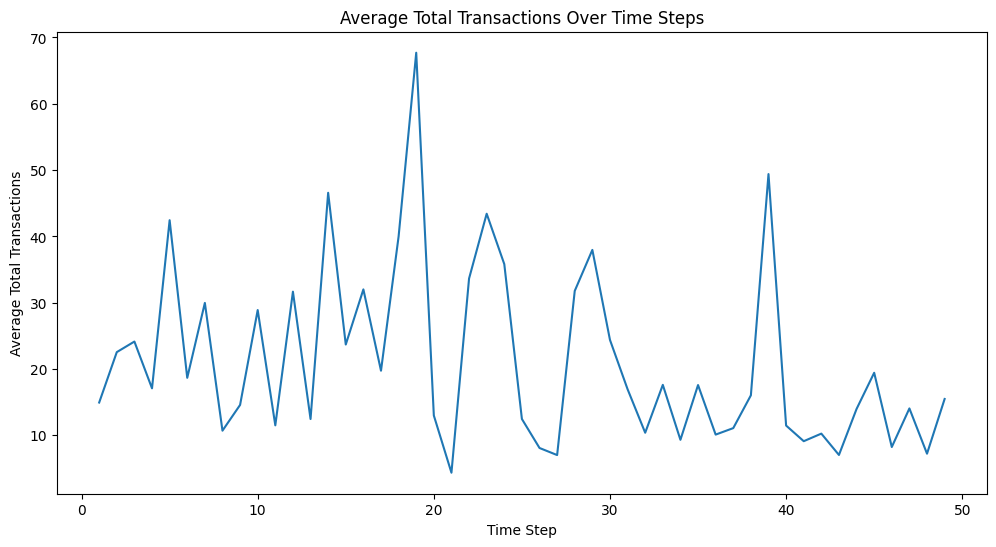

In [12]:
# Ensure only numeric columns are used for aggregation
numeric_columns = wallets_features_classes_combined_df.select_dtypes(include=[np.number]).columns
time_step_features = wallets_features_classes_combined_df.groupby('Time step')[numeric_columns].mean()

# Plot trends for total transactions over time
if 'total_txs' in time_step_features.columns:
    plt.figure(figsize=(12, 6))
    time_step_features['total_txs'].plot(kind='line')
    plt.title('Average Total Transactions Over Time Steps')
    plt.xlabel('Time Step')
    plt.ylabel('Average Total Transactions')
    plt.show()
else:
    print("'total_txs' not found in numeric columns.")


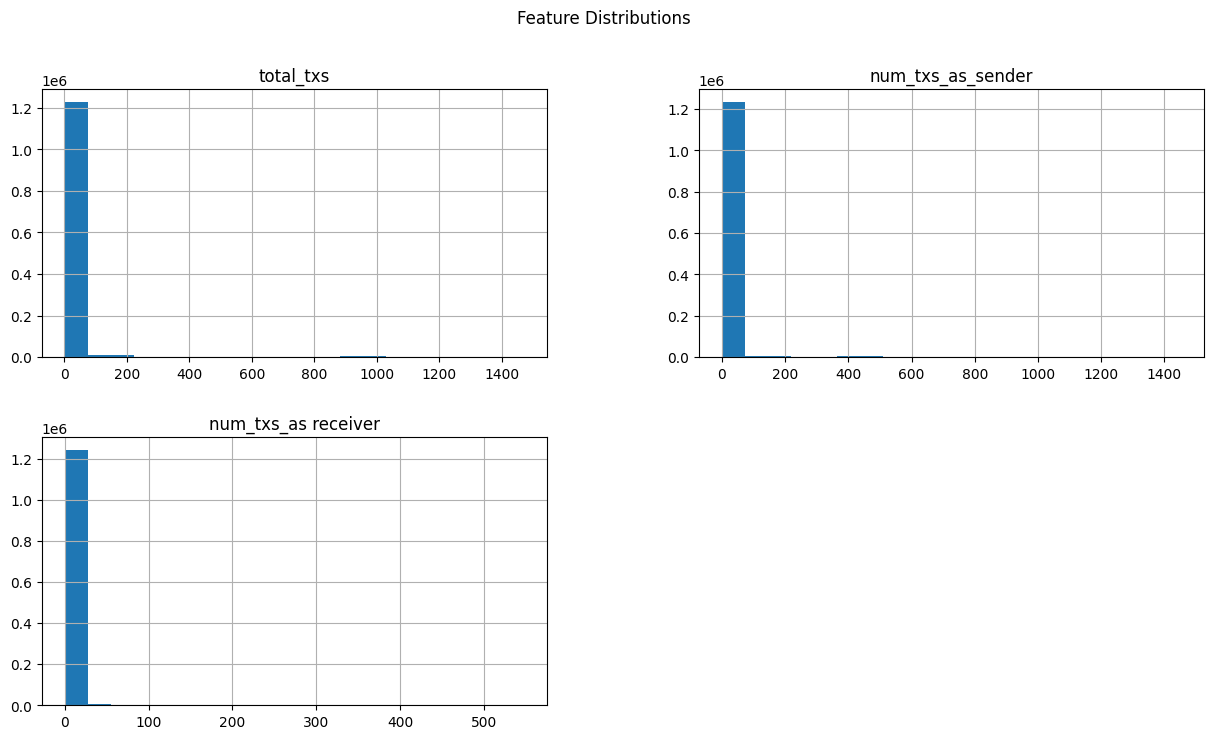

In [10]:
# Histogram for selected features
features_to_plot = ['total_txs', 'num_txs_as_sender', 'num_txs_as receiver']
wallets_features_df[features_to_plot].hist(bins=20, figsize=(15, 8))
plt.suptitle("Feature Distributions")
plt.show()


In [16]:
# Merge datasets for deeper analysis
combined_data = wallets_classes_df.merge(wallets_features_classes_combined_df, on='address')
print(combined_data.head())


                             address  class_x  Time step  class_y  \
0  111112TykSw72ztDN2WJger4cynzWYC5w        2         25        2   
1  1111DAYXhoxZx2tsRnzimfozo783x1yC2        3         25        3   
2  1111DAYXhoxZx2tsRnzimfozo783x1yC2        3         29        3   
3  1111DAYXhoxZx2tsRnzimfozo783x1yC2        3         39        3   
4  1111DAYXhoxZx2tsRnzimfozo783x1yC2        3         39        3   

   num_txs_as_sender  num_txs_as receiver  first_block_appeared_in  \
0                0.0                  1.0                 439586.0   
1                0.0                  8.0                 439589.0   
2                0.0                  8.0                 439589.0   
3                0.0                  8.0                 439589.0   
4                0.0                  8.0                 439589.0   

   last_block_appeared_in  lifetime_in_blocks  total_txs  ...  \
0                439586.0                 0.0        1.0  ...   
1                485959.0         